Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

data = pd.read_excel('/content/predicted_dataset.xlsx')
print(data.columns)
# Impute missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
X = data[['Humidity', 'Day Temp', 'Night Temp', 'Crop Growth']]
X = imputer.fit_transform(X)
# Define target variable
y = data['Risk']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a machine learning model (Decision Tree Classifier)
model = DecisionTreeClassifier()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Now, you can use the trained model to make predictions for new data
new_data = pd.DataFrame({'Humidity': [1], 'Day Temp': [1],'Night Temp': [2], 'Crop Growth': [3]})
new_data = imputer.transform(new_data)
predicted_risk = model.predict(new_data)
print("Predicted Risk for New Data:", predicted_risk)

Metrics

Model Accuracy: 0.9038461538461539
Precision: 0.9057569033530571
Recall: 0.9038461538461539
Confusion Matrix:
[[18  1  0  0]
 [ 1 11  1  0]
 [ 0  0  7  2]
 [ 0  0  0 11]]


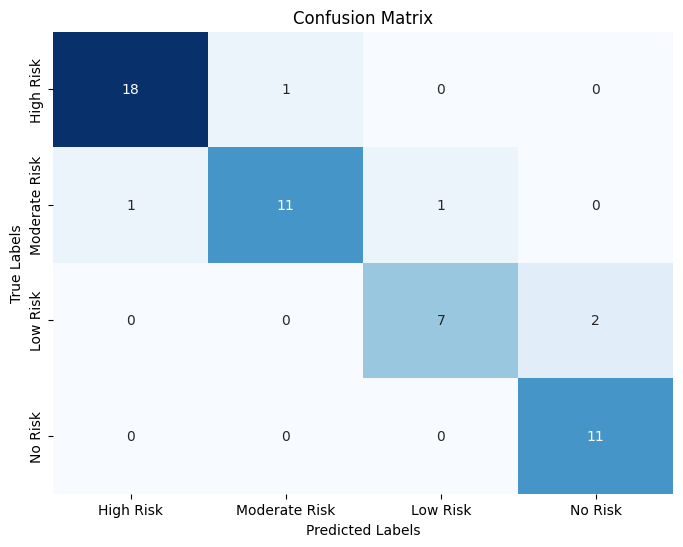

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Load data
data = pd.read_excel('/content/predicted_dataset.xlsx')

# Impute missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
X = data[['Humidity', 'Day Temp', 'Night Temp', 'Crop Growth']]
X = imputer.fit_transform(X)

# Define target variable
y = data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a machine learning model (Decision Tree Classifier)
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

########### Metrics
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the colorful confusion matrix with custom labels
labels = ['High Risk', 'Moderate Risk', 'Low Risk', 'No Risk']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Changed import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Load the dataset
data = pd.read_excel('/content/predicted_dataset.xlsx')

# Impute missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
X = data[['Humidity', 'Day Temp', 'Night Temp', 'Crop Growth']]
X = imputer.fit_transform(X)
y = data['Risk']

# Ensure labels start from 0
y = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a DecisionTreeClassifier with adjusted hyperparameters
model_dt = DecisionTreeClassifier(max_depth=15, random_state=42)  # Changed to DecisionTreeClassifier
model_dt.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print metrics for Decision Tree
print("Decision Tree Model Metrics:")
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_rep_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Decision Tree Model Metrics:
Accuracy: 0.9038461538461539
Classification Report:
               precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        19
     Class 2       1.00      0.92      0.96        13
     Class 3       0.75      0.67      0.71         9
     Class 4       0.77      0.91      0.83        11

    accuracy                           0.90        52
   macro avg       0.88      0.87      0.87        52
weighted avg       0.91      0.90      0.90        52

Confusion Matrix:
 [[19  0  0  0]
 [ 0 12  1  0]
 [ 0  0  6  3]
 [ 0  0  1 10]]
